In [334]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [335]:
# getting train data
data = pd.read_csv("data/train.csv")

In [336]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [337]:
data.shape

(69999, 172)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


The train dataset contains a total of 172 columns out of which 135 are of float64, 28 are of int64 and 9 of object types.

## Data Pre-processing

### Handling missing values and unnecessary columns

In [339]:
# creating a function for getting percentage of null values in columns having atleast 1 null value and storing in a dataframe
def getNullColumns(df):
    null_columns= pd.DataFrame(round(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0],2)).reset_index()
    null_columns.columns=["columns","null"]
    null_columns.shape
    return null_columns

In [340]:
null_columns = getNullColumns(data)

In [341]:
null_columns.head()

,columns,null
0,loc_og_t2o_mou,1.00
1,std_og_t2o_mou,1.00
2,loc_ic_t2o_mou,1.00
3,last_date_of_month_7,0.57
4,last_date_of_month_8,1.05


In [342]:
# getting description about all recharge columns
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
                 ]

data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


Looking above,some recharge columns have minimum value of 1 while some don't. We can replace NaN values with 0 for all recharge columns with minimum value 1 as it will indicate that the customer has not recharged.

In [343]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [344]:
# calculating null columns again
null_columns = getNullColumns(data)

In [345]:
null_columns.sort_values(by="null",ascending=False)

,columns,null
113,fb_user_6,74.90
95,date_of_last_rech_data_6,74.90
110,night_pck_user_6,74.90
107,arpu_2g_6,74.90
98,count_rech_2g_6,74.90
...,...,...
4,last_date_of_month_8,1.05
1,std_og_t2o_mou,1.00
2,loc_ic_t2o_mou,1.00
0,loc_og_t2o_mou,1.00


There are 116 columns with null values. Removing all columns with more than 60% missing values.

In [346]:
# getting index of all columns with null percentage greater than 35 and remove them
null_35_columns = null_columns.loc[null_columns['null'] > 60,'columns']
data = data.drop(null_35_columns,axis=1)

In [347]:
data.shape

(69999, 151)

Getting null columns and percentage after removing all columns with null values greater than 60%

In [348]:
null_columns_remain = getNullColumns(data)

In [349]:
null_columns_remain.sort_values(by="null",ascending=False)

,columns,null
43,std_og_t2c_mou_8,5.29
31,loc_og_mou_8,5.29
22,loc_og_t2m_mou_8,5.29
64,loc_ic_t2f_mou_8,5.29
25,loc_og_t2f_mou_8,5.29
...,...,...
4,last_date_of_month_8,1.05
1,std_og_t2o_mou,1.00
2,loc_ic_t2o_mou,1.00
0,loc_og_t2o_mou,1.00


After removing high null values columns, 95 columns are left with null values and the maximum percentage of null values in a column is 5.29%

In [350]:
# getting unique values in each column
lessUnique = []
moreUnique = []
mostUnique = []
for col in data.columns.values:
    size = data[col].unique().size
    if(size < 100):
        lessUnique.append((col,size))
    elif(size > 100 and size < 20000):
        moreUnique.append((col,size))
    else:
        mostUnique.append((col,size))
print("columns with unique values less than 100 are {0}".format(len(lessUnique)))      
print(lessUnique)

print("\n columns with unique values more than 100 and less than 20000 are {0}".format(len(moreUnique)))        
print(moreUnique)    

print("\n columns with unique values more than 20000 are {0}".format(len(mostUnique)))        
print(mostUnique)  

columns with unique values less than 100 are 40
[('circle_id', 1), ('loc_og_t2o_mou', 2), ('std_og_t2o_mou', 2), ('loc_ic_t2o_mou', 2), ('last_date_of_month_6', 1), ('last_date_of_month_7', 2), ('last_date_of_month_8', 2), ('std_og_t2c_mou_6', 2), ('std_og_t2c_mou_7', 2), ('std_og_t2c_mou_8', 2), ('std_ic_t2o_mou_6', 2), ('std_ic_t2o_mou_7', 2), ('std_ic_t2o_mou_8', 2), ('spl_ic_mou_6', 79), ('spl_ic_mou_8', 96), ('total_rech_num_6', 94), ('total_rech_num_7', 96), ('total_rech_num_8', 92), ('date_of_last_rech_6', 31), ('date_of_last_rech_7', 32), ('date_of_last_rech_8', 32), ('total_rech_data_6', 37), ('total_rech_data_7', 42), ('total_rech_data_8', 45), ('max_rech_data_6', 48), ('max_rech_data_7', 46), ('max_rech_data_8', 50), ('monthly_2g_6', 5), ('monthly_2g_7', 6), ('monthly_2g_8', 6), ('sachet_2g_6', 30), ('sachet_2g_7', 33), ('sachet_2g_8', 32), ('monthly_3g_6', 10), ('monthly_3g_7', 13), ('monthly_3g_8', 12), ('sachet_3g_6', 23), ('sachet_3g_7', 26), ('sachet_3g_8', 28), ('churn

===================

Looking above:
1. 'circle_id': only 1 unique value hence can be dropped 
2.'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8' have only 2 unique values i.e 0 and null. Hence, these columns can be dropped.
3. 'id' column can be dropped as it has all unique values
4. We can drop date columns as they will not be much of assistance in churn prediction. Hence we can remove 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'

====================

In [351]:
data.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','id','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],axis=1,inplace=True)

In [352]:
data.shape

(69999, 136)

Now we are left with 69999 rows and 136 columns

Getting all null columns after dropping data again 

In [353]:
null_columns_remain = getNullColumns(data)
null_columns_remain.sort_values(by="null",ascending=False)

,columns,null
82,ic_others_8,5.29
64,std_ic_t2t_mou_8,5.29
37,std_og_t2f_mou_8,5.29
46,spl_og_mou_8,5.29
34,std_og_t2m_mou_8,5.29
...,...,...
27,loc_og_mou_7,3.84
54,loc_ic_t2m_mou_7,3.84
21,loc_og_t2f_mou_7,3.84
1,loc_ic_t2o_mou,1.00


related dictionary:

1. MOU: Minutes of usage voice calls.
2. T2F: Operator T to fixed lines of T
3. T2M    	Operator T to other operator mobile
4. LOC	Local calls  within same telecom circle
5. IC	Incoming calls
6. OG	Outgoing calls
7. STD	STD calls  outside the calling circle
8. ONNET   	All kind of calls within the same operator network
9. OFFNET    	All kind of calls outside the operator T network

In [354]:
Fcount=0
Icount = 0
Ocount = 0
for cols in null_columns_remain["columns"].unique():
    if (data[cols].dtype == "float64"):
        Fcount+=1
    elif(data[cols].dtype == "int64"):
        Icount+=1
    else:
        Ocount +=1
        
print("column count with float type is {0}. Column count with int type is {1} and column count with object type is {2}.".format(Fcount,Icount,Ocount))

column count with float type is 83. Column count with int type is 0 and column count with object type is 0.


All columns are of float type. MOU represents the minutes of usage voice calls. As we don't have much info on why there were missing values in MOU and all columns are of float type, we can go ahead and impute the missing values as 0.

In [355]:
data = data.fillna(0)

Getting count of null values again.

In [356]:
null_columns_remain = getNullColumns(data)
print("Null rows count is: "+ str(null_columns_remain.shape[0]))
print("Resulting Dataset size after handling missing values and removing unwanted columns: " + str(data.shape))

Null rows count is: 0
Resulting Dataset size after handling missing values and removing unwanted columns: (69999, 136)


Now there are no null values remaining in the dataset. Also, we have all rows and 136 columns remaining.Hence, we can proceed further

### Removing outliers

In [357]:
total_cols = [col for col in data.columns if 'total' in col]
print(total_cols)

['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']


In [358]:
# checking outliers for "total_rech_amt_6"
data["total_rech_amt_6"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    69999.000000
mean       328.139788
std        404.211068
min          0.000000
25%        110.000000
50%        229.000000
75%        438.000000
90%        735.000000
95%        998.000000
99%       1683.020000
max      35190.000000
Name: total_rech_amt_6, dtype: float64

As can be seen from above, there are outliers above 99 percentile of "total_rech_amt_6". Hence need to remove all items with percentile greater than 99

In [359]:
# removing outliers
data = data[~(data["total_rech_amt_6"] > data["total_rech_amt_6"].quantile(0.99))]

In [360]:
# checking outliers for "total_rech_amt_7"
data["total_rech_amt_7"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    69299.000000
mean       307.812133
std        326.000743
min          0.000000
25%        100.000000
50%        220.000000
75%        420.000000
90%        705.000000
95%        935.000000
99%       1500.000000
max       6550.000000
Name: total_rech_amt_7, dtype: float64

In [361]:
# As can be seen from above, there are outliers above 99 percentile of "total_rech_amt_7". Hence need to remove all items with percentile greater than 99
data = data[~(data["total_rech_amt_7"] > data["total_rech_amt_7"].quantile(0.99))]

In [362]:
# checking outliers for "total_rech_amt_8"
data["total_rech_amt_8"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    68618.000000
mean       300.792970
std        308.584464
min          0.000000
25%         90.000000
50%        219.000000
75%        421.000000
90%        689.000000
95%        898.000000
99%       1394.000000
max       7917.000000
Name: total_rech_amt_8, dtype: float64

In [363]:
# As can be seen from above, there are outliers above 99 percentile of "total_rech_amt_7". Hence need to remove all items with percentile greater than 99
data = data[~(data["total_rech_amt_8"] > data["total_rech_amt_8"].quantile(0.99))]

In [364]:
# checking outliers for "total_rech_data_6"
data["total_rech_data_6"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    67932.000000
mean         0.603824
std          1.732670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          2.000000
95%          3.000000
99%          9.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

In [365]:
# As can be seen from above, there are outliers above 99 percentile of "total_rech_data_6". Hence need to remove all items with percentile greater than 99
data = data[~(data["total_rech_data_6"] > data["total_rech_data_6"].quantile(0.99))]

In [366]:
# checking outliers for "total_rech_data_7"
data["total_rech_data_7"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    67381.000000
mean         0.586931
std          1.581064
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          2.000000
95%          3.000000
99%          8.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

In [367]:
# As can be seen from above, there are outliers above 99 percentile of "total_rech_data_7". Hence need to remove all items with percentile greater than 99
data = data[~(data["total_rech_data_7"] > data["total_rech_data_7"].quantile(0.99))]

In [368]:
# checking outliers for "total_rech_data_8"
data["total_rech_data_8"].describe(percentiles =[0.25,0.5,0.75,0.9,0.95,0.99])

count    66824.000000
mean         0.553319
std          1.451911
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          2.000000
95%          3.000000
99%          7.000000
max         37.000000
Name: total_rech_data_8, dtype: float64

In [369]:
# As can be seen from above, there are outliers above 99 percentile of "total_rech_data_8". Hence need to remove all items with percentile greater than 99
data = data[~(data["total_rech_data_8"] > data["total_rech_data_8"].quantile(0.99))]

In [370]:
data.shape

(66256, 136)

As mentioned in problem statement, we need to predict churn only for the high-value customers. 

We are assuming high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the all 3 months.

In [371]:
# calculate the total data recharge amount for June,July and August --> number of recharges * average recharge amount
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data['total_data_rech_8'] = data.total_rech_data_8 * data.av_rech_amt_data_8

In [372]:
# calculate total recharge amount for June,July and August --> call recharge amount + data recharge amount
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_data_rech_8

In [373]:
#Calculate Average amount of recharge of 6th and 7th month and saving it in a new variable avg_amnt_6_7
data['avg_amnt_6_7_8'] = (data["amt_data_6"] + data["amt_data_7"] + data["amt_data_8"])/3

#filter based on 65th percentile .
df_HighEndCx = data[data["avg_amnt_6_7_8"]>= data["avg_amnt_6_7_8"].quantile(.65)]

In [374]:
df_HighEndCx.shape

(23193, 143)

In [375]:
# removing redundant columns as new columns are derived from them.
redundant_cols = ["avg_amnt_6_7_8","total_rech_data_6","total_rech_data_7","total_rech_data_8","av_rech_amt_data_6","av_rech_amt_data_7",
                  "av_rech_amt_data_8","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]
df_HighEndCx.drop(columns = redundant_cols,axis=1,inplace=True)

In [376]:
df_HighEndCx.shape

(23193, 133)

For high end customers, we have 23193 rows and 133 columns

## Visualize Data

We have "churn_probability" column as target column.

Plotting churn_probability to get the distribution of class. 1 represents customer will churn and 0 represents customer will not churn.

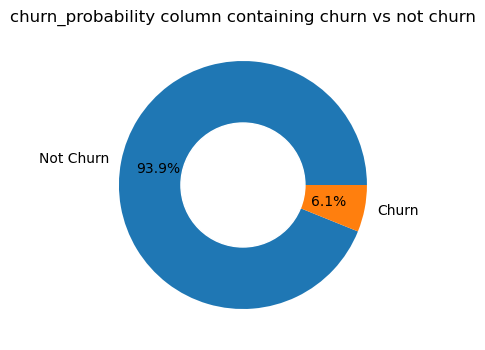

In [377]:
# Plotting churn_probability to get the distribution of class.

plt.figure(figsize=(4,5))
equal = list(df_HighEndCx["churn_probability"].value_counts())
plt.pie(equal,labels= ["Not Churn","Churn"],autopct='%1.1f%%',pctdistance=0.7)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("churn_probability column containing churn vs not churn")
plt.show()

As seen above, only around 6.1% of high paying customers have a probability to churn and rest 93.9% will not churn. Hence, it's a highly imbalanced dataset.

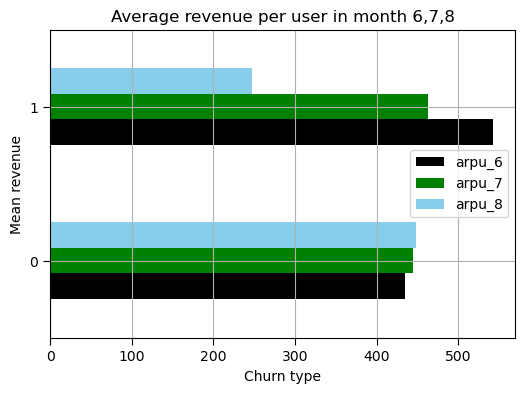

In [378]:
# Plot to visualize average revenue per user(ARPU)
df_HighEndCx.groupby("churn_probability")["arpu_6","arpu_7","arpu_8"].mean().plot.barh(figsize=[6,4],color=["black","green","skyblue"])
plt.title("Average revenue per user in month 6,7,8",fontsize=12)
plt.tick_params(size=5,labelsize = 10) 
plt.ylabel("Mean revenue",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.grid(0.5)
plt.show()

Average revenue per user in month 6,7,8 is approximately same for non churn customers but varies significantly for customers with high churn probability. The average revenue decreases significantly by month. 
Hence, it's a good variable for training.

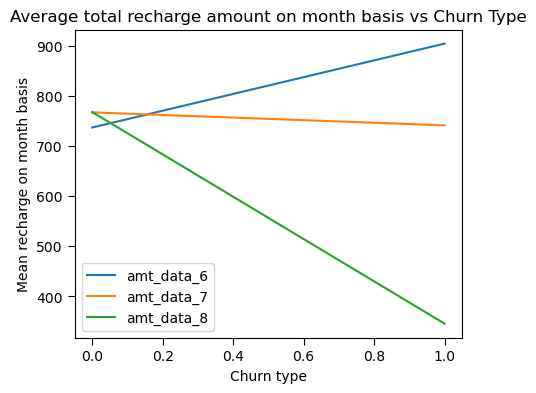

In [379]:
# plotting "amt_data_6","amt_data_7" and "amt_data_8" with non churn_prpbability column
df_HighEndCx.groupby("churn_probability")["amt_data_6","amt_data_7","amt_data_8"].mean().plot.line(figsize=[5,4])
plt.title("Average total recharge amount on month basis vs Churn Type",fontsize=12)
plt.tick_params(size=5,labelsize = 10) 
plt.ylabel("Mean recharge on month basis",fontsize=10)
plt.xlabel("Churn type",fontsize=10)
plt.show()

As seen above, the average recharge decreases considerably on monthly basis when the customer is about to churn. Hence, if recharge value is decreasing then it suggests that the customer might churn.

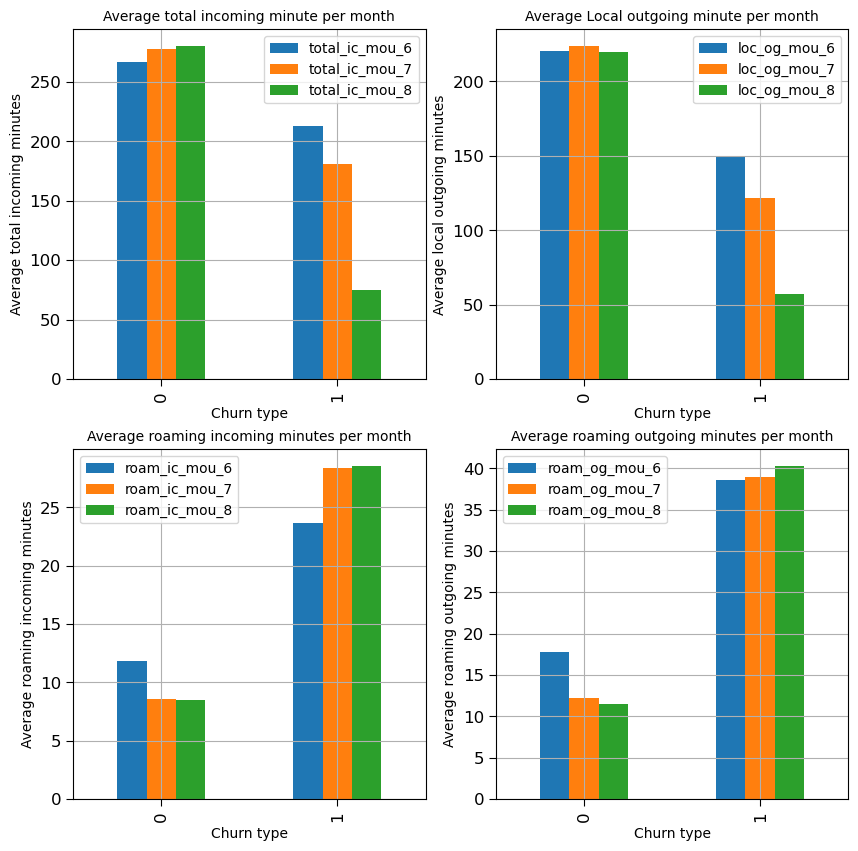

In [380]:
#Plotting to visualize total_ic_mou with churn_probability

fig,[[ax11,ax12],[ax21,ax22]] = plt.subplots(nrows=2,ncols=2, figsize=(100, 40))
df_HighEndCx.groupby("churn_probability")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].mean().plot.bar(figsize=[10,10],ax=ax11)
ax11.tick_params(size=5,labelsize = 12) 
ax11.set_title("Average total incoming minute per month",fontsize=10)
ax11.set_ylabel("Average total incoming minutes",fontsize=10)
ax11.set_xlabel("Churn type",fontsize=10)
ax11.grid(0.2)

#Plotting to visualize loc_og_mou with churn_probability
df_HighEndCx.groupby("churn_probability")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].mean().plot.bar(figsize=[10,10],ax=ax12)
ax12.tick_params(size=5,labelsize = 12) 
ax12.set_title("Average Local outgoing minute per month",fontsize=10)
ax12.set_ylabel("Average local outgoing minutes",fontsize=10)
ax12.set_xlabel("Churn type",fontsize=10)
ax12.grid(0.2)

#Plotting to visualize roam_ic_mou with churn_probability
df_HighEndCx.groupby("churn_probability")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar(figsize=[10,10],ax=ax21)
ax21.tick_params(size=5,labelsize = 12) 
ax21.set_title("Average roaming incoming minutes per month",fontsize=10)
ax21.set_ylabel("Average roaming incoming minutes",fontsize=10)
ax21.set_xlabel("Churn type",fontsize=10)
ax21.grid(0.2)

#Plotting to visualize roam_og_mou with churn_probability
df_HighEndCx.groupby("churn_probability")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar(figsize=[10,10],ax=ax22)
ax22.tick_params(size=5,labelsize = 12) 
ax22.set_title("Average roaming outgoing minutes per month",fontsize=10)
ax22.set_ylabel("Average roaming outgoing minutes",fontsize=10)
ax22.set_xlabel("Churn type",fontsize=10)
ax22.grid(0.2)

plt.show()

1. Average total incoming call minutes decreases drastically when customer is about to churn. Hence, it's a good variable for model training.
2. Average local outgoing call minutes decreases drastically when customer is about to churn. This means that customer begins to limit usage of calling with current network.
3. Average roaming incoming and outgoing minutes are also high when customer is about to churn. This may be due to high roaming costs. Company should take the romaing pricing into consideration to prevent customer churn.

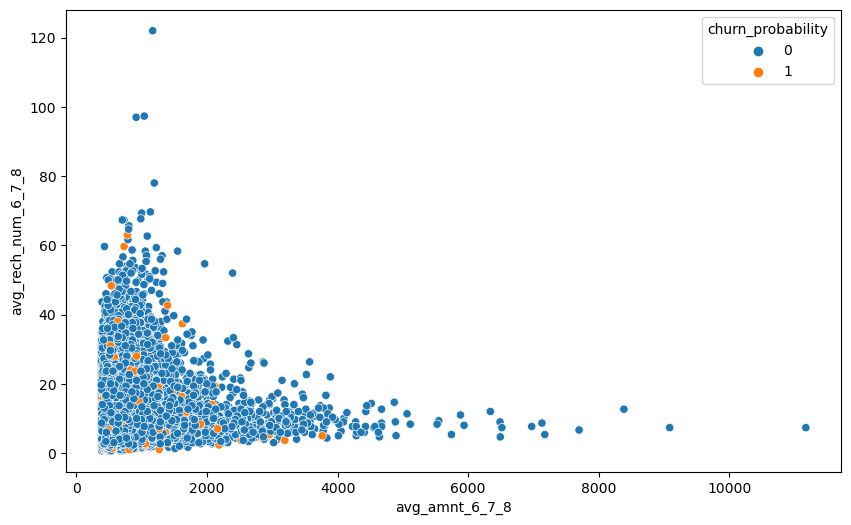

In [381]:
#Analysis of recharge amount and number of recharge in action month
df_HighEndCx["avg_rech_num_6_7_8"]=(df_HighEndCx["total_rech_num_6"]+df_HighEndCx["total_rech_num_7"]+df_HighEndCx["total_rech_num_8"])/3
df_HighEndCx['avg_amnt_6_7_8'] = (df_HighEndCx["amt_data_6"] + df_HighEndCx["amt_data_7"] + df_HighEndCx["amt_data_8"])/3

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_amnt_6_7_8',y='avg_rech_num_6_7_8', hue='churn_probability', data=df_HighEndCx)

We can see from the above pattern that the average recharge number for months 6,7,8 and the average recharge amounts are slightly linear. Hence, there are a small correlation between the two.

Now we can drop the derived variables which are not required in further analysis.

In [382]:
df_HighEndCx.drop(["avg_rech_num_6_7_8","avg_amnt_6_7_8"],axis=1,inplace=True)

In [383]:
df_HighEndCx.shape

(23193, 133)

## Model Building

### Train-test split

In [384]:
# importing libraries for model training and train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import train_test_split

In [385]:
# dropping Y variable from X
y= df_HighEndCx.pop("churn_probability")
X= df_HighEndCx

In [189]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [190]:
X_test.shape

(4639, 132)

### Synthetic Minority Oversampling Technique (SMOTE)

As this dataset is an imbalanced dataset, we need to oversample the minority class for better fitting of the model. For this, we will use SMOTE on training dataset to make the dataset a balanced dataset.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [191]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [192]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Fitting SMOTE to the training set
sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [193]:
y_train.value_counts()

0    17402
1    17402
Name: churn_probability, dtype: int64

As can be seen, the total rows has been increased to 34742 and the y_train has equal number of datasamples in a class.

### Feature scaling

In order to use PCA, it's mandatory to scale the traiing and test features. So we will use scandardScaler to scale the features

In [194]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34804 entries, 0 to 34803
Columns: 132 entries, loc_og_t2o_mou to amt_data_8
dtypes: float64(110), int64(22)
memory usage: 35.1 MB


As can be seen, there are no object features. Hence, we can proceed with scaling.

In [195]:
# importing standard scaler library
from sklearn.preprocessing import StandardScaler

# scaling all columns of X-train
cols = X_train.columns.to_list()
scaler=StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[cols]),columns=cols)

In [196]:
X_train_scale

,loc_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8,amt_data_6,amt_data_7,amt_data_8
0,0.0,0.0,-0.937333,-0.962164,-0.690266,-0.541112,-0.482372,-0.401243,-0.471422,-0.454758,...,-0.010642,2.265401,3.121323,1.344517,3.995525,4.271170,5.729637,2.865348,3.123307,3.853012
1,0.0,0.0,-0.557229,0.734039,-1.270703,0.359663,0.307865,-0.346876,-0.483194,-0.502112,...,0.179571,0.164814,2.287715,-0.342415,-0.433079,0.903512,-0.389363,-0.658560,1.140503,-1.000651
2,0.0,0.0,0.917796,-0.104662,-1.314153,0.162300,-0.497595,-0.535449,-0.305426,-0.374292,...,-0.196299,-0.333901,-0.346372,-0.078668,-0.433079,-0.419634,-0.389363,0.134862,-0.486539,-1.000651
3,0.0,0.0,1.149039,0.893115,1.453948,-0.500992,-0.455500,-0.400133,0.924916,0.703197,...,-0.481049,-0.333901,-0.346372,-0.342415,0.025806,1.524581,1.779460,0.235589,1.318384,2.383369
4,0.0,0.0,0.032562,0.867368,1.309373,-0.361316,-0.358261,0.456073,0.735257,1.687386,...,-0.785163,-0.333901,-0.346372,-0.342415,-0.433079,-0.419634,-0.389363,-0.361027,0.045473,0.474482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34799,0.0,0.0,0.018459,0.443628,1.248423,0.014787,0.489412,1.538009,0.200799,0.854722,...,-0.754410,-0.333901,-0.346372,-0.342415,-0.433079,-0.419634,-0.389363,-0.269962,-0.126072,0.382597
34800,0.0,0.0,1.031389,1.466634,-1.206543,-0.450139,-0.318087,-0.527731,2.987558,3.712758,...,-0.366010,-0.333901,-0.346372,-0.342415,-0.433079,-0.419634,-0.389363,0.173876,0.400017,-1.000651
34801,0.0,0.0,-0.120662,0.861211,-0.719917,-0.076306,0.263569,-0.106727,0.318813,1.111518,...,-0.436628,-0.333901,-0.346372,-0.342415,-0.259899,-0.419634,-0.365735,-0.305899,0.040266,-0.635295
34802,0.0,0.0,0.598334,1.438987,-0.802045,-0.449849,-0.254333,-0.261475,2.569845,4.090627,...,-0.067592,-0.333901,-0.346372,-0.342415,-0.433079,-0.419634,-0.389363,0.060555,0.209601,-0.477199


In [197]:
# scaling X-test with same scaler used to fit X-train
cols = X_test.columns.to_list()
X_test_scale = pd.DataFrame(scaler.transform(X_test[cols]))

### Performing PCA

As we have 126 columns/features and there might be multicollinearity between features, in order to remove collinearity and reducing complexity of model, we will use PCA

In [198]:
# importing the library
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
X_train_pca = pca.fit(X_train_scale)

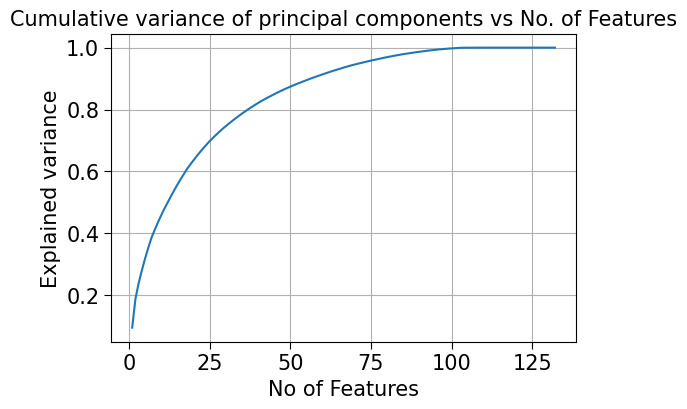

In [199]:
# getting cumulative sum of explained variance and plotting SCREE plot
var_cumu_ev = np.cumsum(X_train_pca.explained_variance_ratio_)

# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu_ev)+1), var_cumu_ev)
plt.title("Cumulative variance of principal components vs No. of Features",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.tick_params(size=5,labelsize = 15)
plt.grid(0.3)


In [200]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.9,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"suitable principal components for 90% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 90% of variance:57


We can see that 57 Features will explain 90% of variance. So, we will perform PCA with 57 components.

In [201]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=57)

# Fit and transform the X_train
X_train_pca_final = pca_final.fit_transform(X_train_scale)

# Fit and transform the X_test
X_test_pca_final = pca_final.transform(X_test_scale)

In [202]:
#check the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(34804, 57)
(4639, 57)


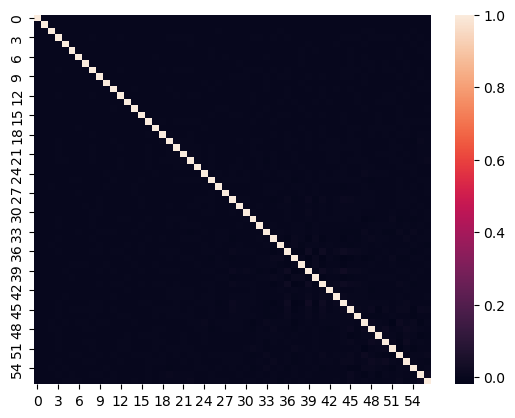

In [203]:
# Check the correlations after PCA and plotting a heatmap
corr = np.corrcoef(X_train_pca_final.transpose())
sns.heatmap(corr)
plt.show()

Looking above, the correlations are almost 0 among all features explaining 90% of training set variance.

In [204]:
### Function for calculating different metrics

#Function definition to check the performance of model on test data
from sklearn import metrics
# accuracy,Precision,recall,f1_score,ROC_AUC
def calculate_performance(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    accuracy = metrics.accuracy_score(y_test,y_pred)
    print(f"accuracy: {accuracy}")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
    #return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"accuracy":[accuracy],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})   

In [205]:
# Create a DataFrame which stores all test score metrics for each model
metric_df = pd.DataFrame({"Model":[None],"accuracy":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

### Logistic regression with PCA and regularization

In [206]:
# importing module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Specify params
params = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as accuracy as we are to take primary metric for evaluation as accuracy
model_lr = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_lr.fit(X_train_pca_final, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [207]:
# Best recall with best optimized value of C
best_score = model_lr.best_score_
best_C = model_lr.best_params_['C']

print(" The highest train accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest train accuracy is 0.822376838444734 at C = 1


In [208]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca_final, y_train)

# Predictions on the train and test set
y_train_pred = log_pca_model.predict(X_train_pca_final)
y_test_pred = log_pca_model.predict(X_test_pca_final)

#check predict probability on train data
pred_prob_train = log_pca_model.predict_proba(X_train_pca_final)

#check predict probability on test data
pred_prob_test = log_pca_model.predict_proba(X_test_pca_final)

In [209]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("LogisticRegression",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
df1 = calculate_performance("LogisticRegression",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
LogisticRegression:
accuracy: 0.8228077232502011
precision: 0.8132493169018011
recall: 0.8380645902769797
f1_score: 0.8254704966746851
roc_auc: 0.9026532590915385

Test Metrics are
LogisticRegression:
accuracy: 0.7926277214917008
precision: 0.18911685994647637
recall: 0.8
f1_score: 0.305916305916306
roc_auc: 0.8793876336154464


In [210]:
#Add test score to dataframe for comparision with other model performance
metric_df= metric_df.dropna()
metric_df = metric_df.append(df1)
metric_df

,Model,accuracy,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.792628,0.189117,0.8,0.305916,0.879388


### Decision Tree with PCA

In [211]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': [40,80,120,160],
    'min_samples_split': [40,80,120,160]
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

model_dt = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 5, 
                           verbose = 1,
                           return_train_score=True)

# Fit the grid search to the data
model_dt.fit(X_train_pca_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [40, 80, 120, 160],
                         'min_samples_split': [40, 80, 120, 160]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [212]:
# Best recall with best optimized value of hyperparameters
best_score = model_dt.best_score_
best_max_depth = model_dt.best_params_['max_depth']
best_min_samples_leaf = model_dt.best_params_['min_samples_leaf']
best_min_samples_split=model_dt.best_params_['min_samples_split']

print(" The highest train accuracy is {0} at max_depth = {1}, min_sample_leaf = {2} and min_samples_split = {3}".format(best_score, best_max_depth,
                                                                                                                     best_min_samples_leaf,best_min_samples_split))

 The highest train accuracy is 0.8374902700926509 at max_depth = 15, min_sample_leaf = 40 and min_samples_split = 80


In [213]:
# Instantiate the model with best hyperparameters
dt_pca = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_leaf=best_min_samples_leaf,min_samples_split=best_min_samples_split)

# Fit the model on the train set
dt_model_pca = dt_pca.fit(X_train_pca_final, y_train)

# Predictions on the train and test set
y_train_pred = dt_model_pca.predict(X_train_pca_final)
y_test_pred = dt_model_pca.predict(X_test_pca_final)

#check predict probability on train data
pred_prob_train = dt_model_pca.predict_proba(X_train_pca_final)

#check predict probability on test data
pred_prob_test = dt_model_pca.predict_proba(X_test_pca_final)

In [214]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("Decision trees",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
df1 = calculate_performance("Decision trees",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
Decision trees:
accuracy: 0.8832605447649695
precision: 0.881572172321071
recall: 0.8854729341455005
f1_score: 0.8835182477566583
roc_auc: 0.9574686314353864

Test Metrics are
Decision trees:
accuracy: 0.8281957318387584
precision: 0.19977426636568849
recall: 0.6679245283018868
f1_score: 0.30755864465682015
roc_auc: 0.8227782522797664


In [215]:
#Add test score to dataframe for comparision with other model performance
metric_df= metric_df.dropna()
metric_df = metric_df.append(df1)
metric_df

,Model,accuracy,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.792628,0.189117,0.800000,0.305916,0.879388
0,Decision trees,0.828196,0.199774,0.667925,0.307559,0.822778


### Random Forest with PCA

In [216]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': [5,10],
    'min_samples_leaf': [50,100],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300], 
    'max_features': [20]
}


# Instantiate the grid search model
rf = RandomForestClassifier()

model_rf = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1,
                           return_train_score=True)

# Fit the grid search to the data
model_rf.fit(X_train_pca_final, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [217]:
# Best recall with best optimized value of hyperparameters
best_score = model_rf.best_score_
best_max_depth = model_rf.best_params_['max_depth']
best_min_samples_leaf = model_rf.best_params_['min_samples_leaf']
best_min_samples_split=model_rf.best_params_['min_samples_split']
best_n_estimators = model_rf.best_params_['n_estimators']
best_max_features = model_rf.best_params_['max_features']

print(" The highest train accuracy is {0} at max_depth = {1}, min_sample_leaf = {2},min_samples_split = {3},n_estimator{4},max_features={5} ".format(best_score, 
                                                                                                                                                     best_max_depth,best_min_samples_leaf,
                                                                                                                                                     best_min_samples_split,best_n_estimators,
                                                                                                                                                    best_max_features))

 The highest train accuracy is 0.8714805048712059 at max_depth = 10, min_sample_leaf = 50,min_samples_split = 50,n_estimator200,max_features=20 


In [218]:
# Instantiate the model with best hyperparameters
rf_pca = RandomForestClassifier(max_depth=best_max_depth,min_samples_leaf=best_min_samples_leaf,
                                min_samples_split=best_min_samples_split,n_estimators=best_n_estimators,max_features=best_max_features)

# Fit the model on the train set
rf_model_pca = rf_pca.fit(X_train_pca_final, y_train)

# Predictions on the train and test set
y_train_pred = rf_model_pca.predict(X_train_pca_final)
y_test_pred = rf_model_pca.predict(X_test_pca_final)

#check predict probability on train data
pred_prob_train = rf_model_pca.predict_proba(X_train_pca_final)

#check predict probability on test data
pred_prob_test = rf_model_pca.predict_proba(X_test_pca_final)

In [219]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("Random Forest",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
df1 = calculate_performance("Random Forest",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
Random Forest:
accuracy: 0.9029134582231927
precision: 0.9063930910566278
recall: 0.8986323411102172
f1_score: 0.9024960323185687
roc_auc: 0.9648990030710473

Test Metrics are
Random Forest:
accuracy: 0.8788532011209312
precision: 0.28064992614475626
recall: 0.7169811320754716
f1_score: 0.4033970276008492
roc_auc: 0.892988586070347


In [220]:
#Add test score to dataframe for comparision with other model performance
metric_df= metric_df.dropna()
metric_df = metric_df.append(df1)
metric_df

,Model,accuracy,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.792628,0.189117,0.800000,0.305916,0.879388
0,Decision trees,0.828196,0.199774,0.667925,0.307559,0.822778
0,Random Forest,0.878853,0.280650,0.716981,0.403397,0.892989


### Gradient Boosting with PCA

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': [5,10],
    'min_samples_leaf': [50,100],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300], 
    'max_features': [20]
}


# Instantiate the grid search model
gb = GradientBoostingClassifier()

model_gb = GridSearchCV(estimator = gb, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1,
                           return_train_score=True)

# Fit the grid search to the data
model_gb.fit(X_train_pca_final, y_train)

In [ ]:
# Best recall with best optimized value of hyperparameters
best_score = model_gb.best_score_
best_max_depth = model_gb.best_params_['max_depth']
best_min_samples_leaf = model_gb.best_params_['min_samples_leaf']
best_min_samples_split=model_gb.best_params_['min_samples_split']
best_n_estimators = model_gb.best_params_['n_estimators']
best_max_features = model_gb.best_params_['max_features']

print(" The highest train accuracy is {0} at max_depth = {1}, min_sample_leaf = {2},min_samples_split = {3},n_estimator={4},max_features={5} ".format(best_score,best_max_depth,best_min_samples_leaf,best_min_samples_split,best_n_estimators,best_max_features))

In [223]:
# Instantiate the model with best hyperparameters
gb_pca = GradientBoostingClassifier(max_depth=best_max_depth,min_samples_leaf=best_min_samples_leaf,
                                min_samples_split=best_min_samples_split,n_estimators=best_n_estimators,max_features=best_max_features)

# Fit the model on the train set
gb_model_pca = gb_pca.fit(X_train_pca_final, y_train)

# Predictions on the train and test set
y_train_pred = gb_model_pca.predict(X_train_pca_final)
y_test_pred = gb_model_pca.predict(X_test_pca_final)

#check predict probability on train data
pred_prob_train = gb_model_pca.predict_proba(X_train_pca_final)

#check predict probability on test data
pred_prob_test = gb_model_pca.predict_proba(X_test_pca_final)

In [224]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("Gradient Boosting",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
df1 = calculate_performance("Gradient Boosting",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
Gradient Boosting:
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
roc_auc: 1.0

Test Metrics are
Gradient Boosting:
accuracy: 0.9288639793058849
precision: 0.40298507462686567
recall: 0.5094339622641509
f1_score: 0.45000000000000007
roc_auc: 0.8856562362502265


In [225]:
#Add test score to dataframe for comparision with other model performance
metric_df= metric_df.dropna()
metric_df = metric_df.append(df1)
metric_df

,Model,accuracy,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.792628,0.189117,0.800000,0.305916,0.879388
0,Decision trees,0.828196,0.199774,0.667925,0.307559,0.822778
0,Random Forest,0.878853,0.280650,0.716981,0.403397,0.892989
0,Gradient Boosting,0.928864,0.402985,0.509434,0.450000,0.885656


### XG Boost

In [111]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [227]:
import xgboost as xgb

# Importing random forest classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': [5,10],
    'subsample':[0,1],
    'n_estimators': [100,200,300], 
    'max_features': [10,20],
    'learning_rate': [0.2,0.4]
}


# Instantiate the grid search model
xgb= xgb.XGBClassifier()

model_xgb = GridSearchCV(estimator = xgb, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1,
                           return_train_score=True)

# Fit the grid search to the data
model_xgb.fit(X_train_pca_final, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[08:10:00] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [5, 10],
                         'max_features': [10, 20],
                         'n_estimators': [100, 200, 300], 'subsample': [0, 1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [228]:
# Best recall with best optimized value of hyperparameters
best_score = model_xgb.best_score_
best_max_depth = model_xgb.best_params_['max_depth']
best_subsample = model_xgb.best_params_['subsample']
best_n_estimators=model_xgb.best_params_['n_estimators']
best_max_features = model_xgb.best_params_['max_features']
best_learning_rate = model_xgb.best_params_['learning_rate']

print(" The highest train accuracy is {0} at max_depth = {1}, subsample = {2},n_estimators = {3},max_features={4},learning_rate={5} ".format(best_score,best_max_depth,best_subsample,best_n_estimators,best_max_features,best_learning_rate))

 The highest train accuracy is 0.9658948542950913 at max_depth = 10, subsample = 1,n_estimators = 300,max_features=10,learning_rate=0.2 


In [229]:
# Instantiate the model with best hyperparameters
import xgboost as xgb
xgb_pca = xgb.XGBClassifier(max_depth=best_max_depth,subsample=best_subsample,
                                n_estimators=best_n_estimators,max_features=best_max_features,learning_rate=best_learning_rate)

# Fit the model on the train set
xgb_model_pca = xgb_pca.fit(X_train_pca_final, y_train)

# Predictions on the train and test set
y_train_pred = xgb_model_pca.predict(X_train_pca_final)
y_test_pred = xgb_model_pca.predict(X_test_pca_final)

#check predict probability on train data
pred_prob_train = xgb_model_pca.predict_proba(X_train_pca_final)

#check predict probability on test data
pred_prob_test = xgb_model_pca.predict_proba(X_test_pca_final)

[08:11:17] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



In [230]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("XG Boost",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
df1 = calculate_performance("XG Boost",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
XG Boost:
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
roc_auc: 1.0

Test Metrics are
XG Boost:
accuracy: 0.9273550334123734
precision: 0.3941176470588235
recall: 0.5056603773584906
f1_score: 0.4429752066115702
roc_auc: 0.8892063738558031


In [231]:
#Add test score to dataframe for comparision with other model performance
metric_df= metric_df.dropna()
metric_df = metric_df.append(df1)
metric_df

,Model,accuracy,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.792628,0.189117,0.800000,0.305916,0.879388
0,Decision trees,0.828196,0.199774,0.667925,0.307559,0.822778
0,Random Forest,0.878853,0.280650,0.716981,0.403397,0.892989
0,Gradient Boosting,0.928864,0.402985,0.509434,0.450000,0.885656
0,XG Boost,0.927355,0.394118,0.505660,0.442975,0.889206


[07:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:41:01] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:42:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:44:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:44:15] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:44:19] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:44:23] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:46:15] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:47:26] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:49:34] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:49:36] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[07:49:37]

Looking above, Gradient Boosting performed best in terms of accuracy. 
For business goal for building a ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn, recall metrics should be used. Recall is best for logistic Regression model hence for this use case logistic regression algorithm should be used.

## Feature importance

For getting important features, we can use Random Forest modeling technique.

In [232]:
# Creating random forest for feature importance with X_train_scale
rf_feature = RandomForestClassifier()

# Fit the model on the train set
rf_model_feature = rf_feature.fit(X_train_scale, y_train)

# Predictions on the train and test set
y_train_pred = rf_model_feature.predict(X_train_scale)
y_test_pred = rf_model_feature.predict(X_test_scale)

#check predict probability on train data
pred_prob_train = rf_model_feature.predict_proba(X_train_scale)

#check predict probability on test data
pred_prob_test = rf_model_feature.predict_proba(X_test_scale)

In [233]:
#check various metric scores on test data

print("Training Metrics are")
calculate_performance("Random forest feature",y_train,y_train_pred,pred_prob_train[:,1])

print("\nTest Metrics are")
calculate_performance("Random Forest feature",y_test,y_test_pred,pred_prob_test[:,1])

Training Metrics are
Random forest feature:
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
roc_auc: 1.0

Test Metrics are
Random Forest feature:
accuracy: 0.9400732916576848
precision: 0.4820936639118457
recall: 0.660377358490566
f1_score: 0.5573248407643312
roc_auc: 0.9251857028237183


,Model,accuracy,precision,recall,f1_score,roc_auc
0,Random Forest feature,0.940073,0.482094,0.660377,0.557325,0.925186


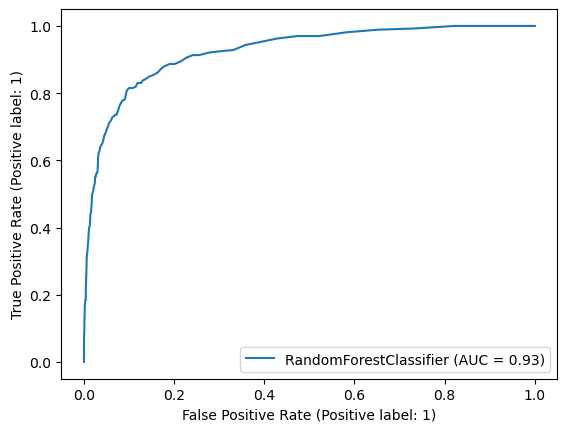

In [234]:
#plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_model_feature,X_test_scale,y_test)
plt.show()

In [235]:
#Creating a Feature importance dataframe
Feature_importance_df = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":rf_model_feature.feature_importances_})

In [236]:
X_train_scale.head()

,loc_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8,amt_data_6,amt_data_7,amt_data_8
0,0.0,0.0,-0.937333,-0.962164,-0.690266,-0.541112,-0.482372,-0.401243,-0.471422,-0.454758,...,-0.010642,2.265401,3.121323,1.344517,3.995525,4.271170,5.729637,2.865348,3.123307,3.853012
1,0.0,0.0,-0.557229,0.734039,-1.270703,0.359663,0.307865,-0.346876,-0.483194,-0.502112,...,0.179571,0.164814,2.287715,-0.342415,-0.433079,0.903512,-0.389363,-0.658560,1.140503,-1.000651
2,0.0,0.0,0.917796,-0.104662,-1.314153,0.162300,-0.497595,-0.535449,-0.305426,-0.374292,...,-0.196299,-0.333901,-0.346372,-0.078668,-0.433079,-0.419634,-0.389363,0.134862,-0.486539,-1.000651
3,0.0,0.0,1.149039,0.893115,1.453948,-0.500992,-0.455500,-0.400133,0.924916,0.703197,...,-0.481049,-0.333901,-0.346372,-0.342415,0.025806,1.524581,1.779460,0.235589,1.318384,2.383369
4,0.0,0.0,0.032562,0.867368,1.309373,-0.361316,-0.358261,0.456073,0.735257,1.687386,...,-0.785163,-0.333901,-0.346372,-0.342415,-0.433079,-0.419634,-0.389363,-0.361027,0.045473,0.474482


In [237]:
#check 40 important features
fi40 = Feature_importance_df.sort_values(by="feature_importance",ascending=False).head(40)
fi40


,columns,feature_importance
13,roam_ic_mou_8,0.086324
16,roam_og_mou_8,0.076118
131,amt_data_8,0.063890
82,total_ic_mou_8,0.048324
67,loc_ic_mou_8,0.045516
61,loc_ic_t2m_mou_8,0.034178
97,max_rech_amt_8,0.025405
100,last_day_rch_amt_8,0.025237
22,loc_og_t2m_mou_8,0.024748
4,arpu_8,0.022328


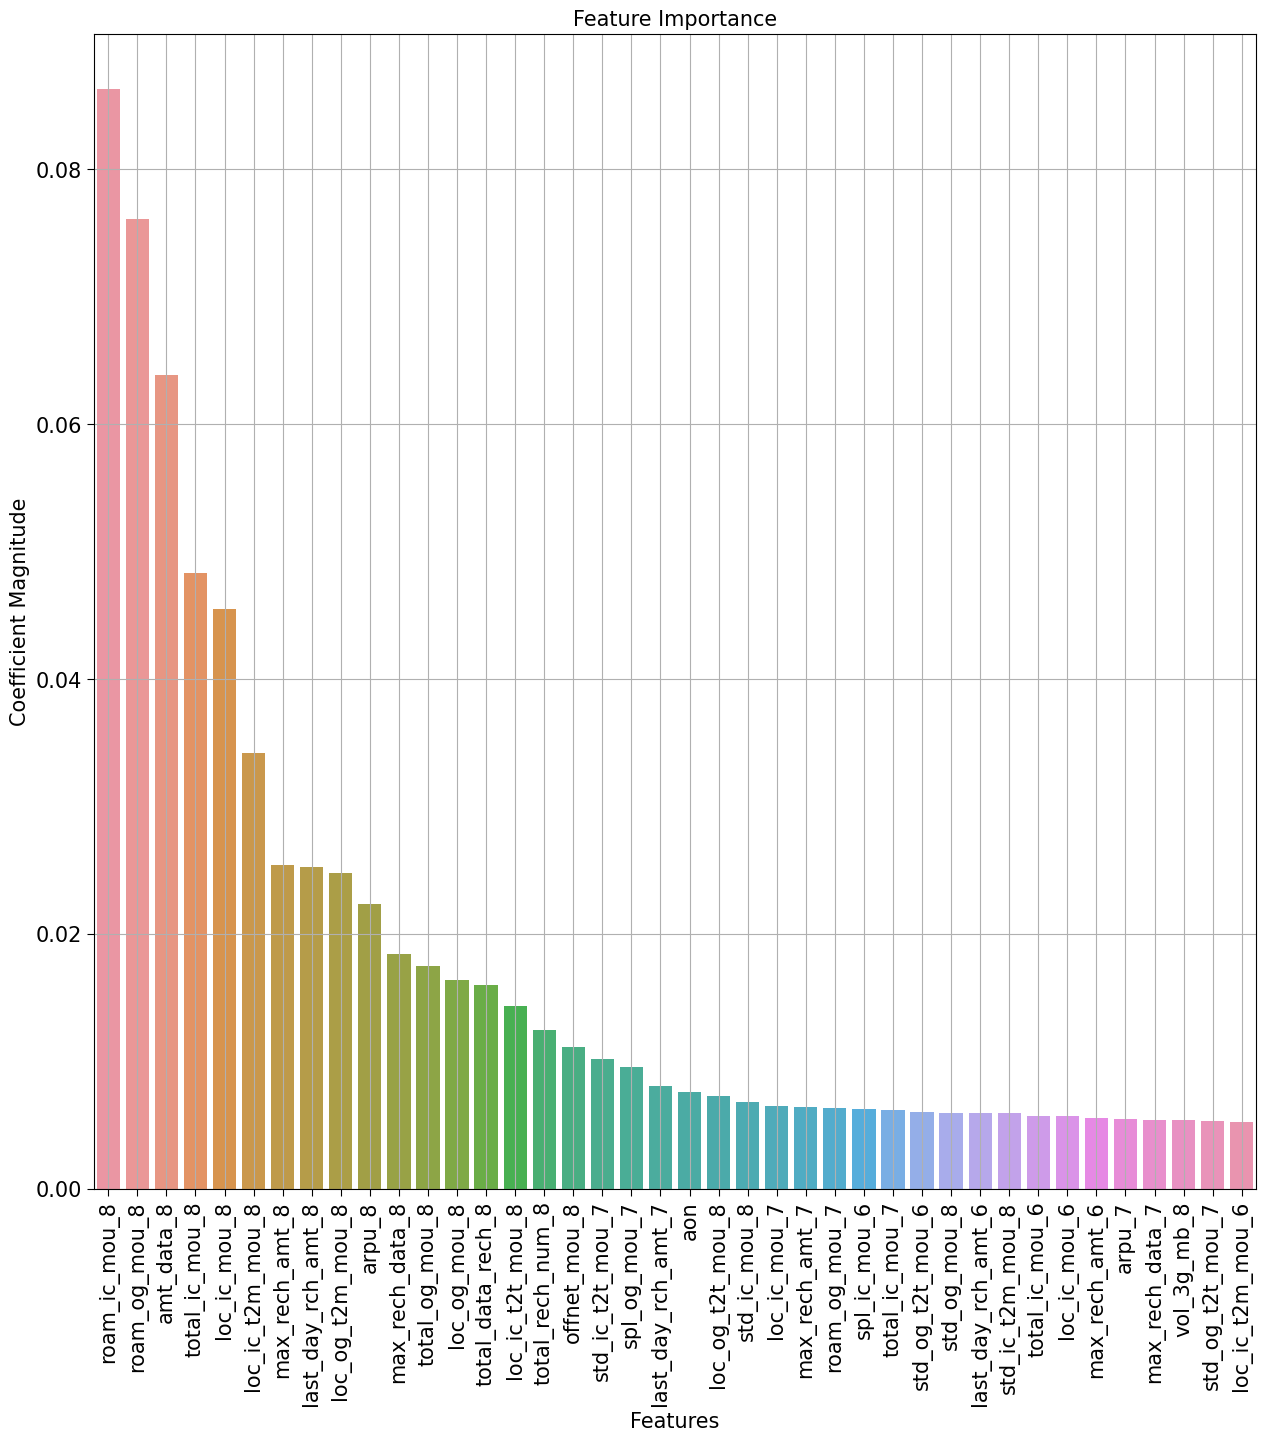

In [238]:
#Plot to show the feature importance
plt.figure(figsize=[15,15])
sns.barplot(x = "columns",y="feature_importance",data=fi40)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)


### Conclusion:

1. The most important features are as shown in above graph.
2. Top 5 important features are roam_ic_mou_8, roam_og_mou_8, amt_data_8, total_ic_mou_8,loc_ic_mou_8 so basically maximum columns are of August Month.
3. Only around 6.1% of high paying customers have a probability to churn and rest 93.9% will not churn. Hence, it's a highly imbalanced dataset.
4. Average revenue per user in month 6,7,8 is approximately same for non churn customers but varies significantly for customers with high churn probability. The average revenue decreases significantly by month. 
5. The average recharge decreases considerably on monthly basis when the customer is about to churn. Hence, if recharge value is decreasing then it suggests that the customer might churn.
6. Average total incoming call minutes decreases drastically when customer is about to churn. Hence, it's a good variable for model training.
7. Average local outgoing call minutes decreases drastically when customer is about to churn. This means that customer begins to limit usage of calling with current network.
8. Average roaming incoming and outgoing minutes are also high when customer is about to churn. This may be due to high roaming costs. Company should take the romaing pricing into consideration to prevent customer churn.

### Recommendations:

Hence, in order to prevent churn, company can:

1. Reduce the pricing for customers using high volume of roaming.
2. Discounts on data and providing customized plans for same.
3. Check for customers whose revenues are decreasing drastically and provide them some good plans to avpid churn.

## Train Gradient boosting model on all training data for highend customers

In [386]:
# scaling all columns of X
cols = X.columns.to_list()
scaler=StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X[cols]),columns=cols)

In [387]:
# performing PCA
X_pca_final = pca_final.fit_transform(X_scale)

In [388]:
X_pca_final.shape

(23193, 57)

In [389]:
# Instantiate the model with best hyperparameters
gb_pca_final = GradientBoostingClassifier(max_depth = 10, subsample = 1,n_estimators = 300,max_features=10,learning_rate=0.2)

# Fit the model on the train set
gb_model_pca_final = gb_pca.fit(X_pca_final, y)

# Predictions on the train and test set
y_pred = gb_model_pca_final.predict(X_pca_final)

### Now we will do preprocessing on test.csv data and then use Gradient Boosting model for predictiion.

In [390]:
test = pd.read_csv("data/test.csv")

In [309]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
# impute missing values with 0
test[zero_impute] = test[zero_impute].apply(lambda x: x.fillna(0))

In [391]:
# calculate the total data recharge amount for June,July and August --> number of recharges * average recharge amount
test['total_data_rech_6'] = test.total_rech_data_6 * test.av_rech_amt_data_6
test['total_data_rech_7'] = test.total_rech_data_7 * test.av_rech_amt_data_7
test['total_data_rech_8'] = test.total_rech_data_8 * test.av_rech_amt_data_8

In [392]:
# calculate total recharge amount for June,July and August --> call recharge amount + data recharge amount
test['amt_data_6'] = test.total_rech_amt_6 + test.total_data_rech_6
test['amt_data_7'] = test.total_rech_amt_7 + test.total_data_rech_7
test['amt_data_8'] = test.total_rech_amt_8 + test.total_data_rech_8

In [393]:
# getting only the columns used to train the model
cols = X.columns.to_list()
test_new = test.loc[:,cols]

In [394]:
test_new.head()

,loc_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8,amt_data_6,amt_data_7,amt_data_8
0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,...,1692,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,...,2533,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,...,277,525.61,758.41,241.84,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,...,1244,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,...,462,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [395]:
# getting count of null values and corresponding columns
null_values = getNullColumns(test_new)

In [396]:
null_values.shape

(92, 2)

In [397]:
null_values.sort_values(by="null",ascending=False)

,columns,null
89,amt_data_6,74.72
83,max_rech_data_6,74.72
86,total_data_rech_6,74.72
84,max_rech_data_7,74.31
90,amt_data_7,74.31
...,...,...
14,loc_og_t2t_mou_6,3.90
71,std_ic_mou_6,3.90
20,loc_og_t2f_mou_6,3.90
1,loc_ic_t2o_mou,1.05


In [398]:
# impute missing values with 0
test_new[test_new.columns.to_list()] = test_new[test_new.columns.to_list()].apply(lambda x: x.fillna(0))

In [399]:
null_values = getNullColumns(test_new)

In [400]:
null_values.shape

(0, 2)

In [401]:
# scaling test_new with same scaler object

X_test_scale = pd.DataFrame(scaler.transform(test_new[test_new.columns.to_list()]))

# applying PCA to test data
X_test_pca_final = pca_final.transform(X_test_scale)

In [402]:
X_test_pca_final.shape

(30000, 57)

In [403]:
# generating predictions on new test data
y_test_pred = gb_model_pca_final.predict(X_test_pca_final)

In [404]:
# creating a new dataframe for predictions
y_test_pred_df = pd.DataFrame(y_test_pred,columns=["churn_probability"])

In [406]:
# getting a new csv file with only 2 columns ID and churn_probability

result_df = pd.concat([test,y_test_pred_df],axis=1,join='inner')
result_df = result_df.loc[:,["id","churn_probability"]]

In [409]:
# saving results as submission.csv 
result_df.to_csv('submission.csv')